In [92]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from logistic_regression_model import LogisticRegressionModel, split_dataset

In [93]:
def create_toy_logistic_regression_dataset(num_samples, num_features, noise=0.01):
    # noise = approximate % of y values that get flipped

    # random features
    X = np.random.randn(num_samples, num_features)

    # theoretical optimal weights and biases
    optimal_weights = np.random.randn(num_features)
    
    optimal_bias = np.random.randn()

    # fake model gives class probabilities
    z = np.dot(X, optimal_weights) + optimal_bias
    prob = 1 / (1 + np.exp(-z))

    # convert probabilites to class labels and add noise
    y = (prob > 0.5).astype(int)
    y = np.where(np.random.rand(num_samples) < noise, 1 - y, y)

    return X, y

# Toy Dataset - 1 feature, 100 samples, 0 noise

In [94]:
num_samples = 100
num_features = 1
noise = 0

X, y = create_toy_logistic_regression_dataset(num_samples, num_features, noise)

In [95]:
X_train, y_train, X_test, y_test = split_dataset(X, y, test_size=0.2, shuffle=True)

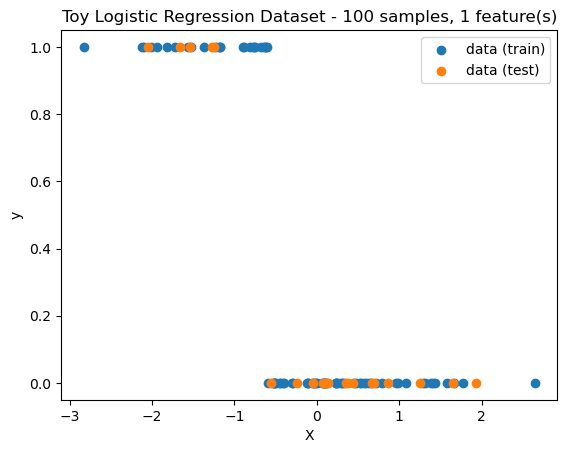

In [96]:
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.xlabel('X')
plt.ylabel('y')
plt.title(f'Toy Logistic Regression Dataset - {num_samples} samples, {num_features} feature(s)')
plt.legend(['data (train)', 'data (test)'])

In [97]:
model = LogisticRegressionModel(num_features)

In [98]:
model.fit(X_train, y_train)

Fitting model: 100%|███████████████████████████████████████████████████████████████████████████████████| 25000/25000 [00:00<00:00, 76173.54it/s]


In [99]:
print(f'Model test accuracy: {model.accuracy(X_test, y_test)}')
print(f'Model test cross entropy (log) loss: {model.loss(X_test, y_test)}')

Model test accuracy: 1.0
Model test cross entropy (log) loss: 0.021732964233134613


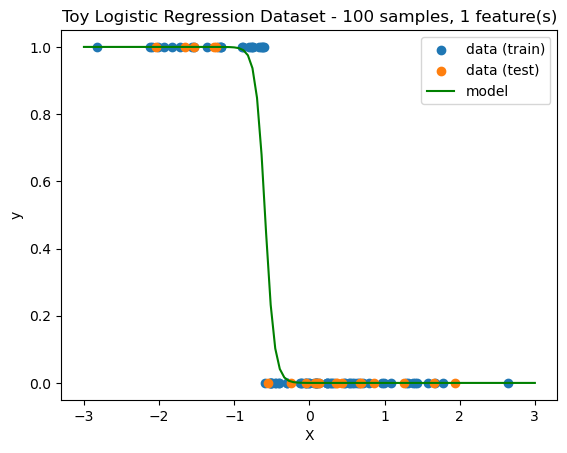

In [100]:
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.plot(np.linspace(-3, 3, 100), model(np.linspace(-3, 3, 100).reshape(-1, 1)), color='g')
plt.xlabel('X')
plt.ylabel('y')
plt.title(f'Toy Logistic Regression Dataset - {num_samples} samples, {num_features} feature(s)')
plt.legend(['data (train)', 'data (test)', 'model'])

# Toy Dataset - 10 features, 500 samples, 10% noise

In [101]:
num_samples = 500
num_features = 10
noise = 0.1

X, y = create_toy_logistic_regression_dataset(num_samples, num_features, noise)

In [102]:
X_train, y_train, X_test, y_test = split_dataset(X, y, test_size=0.2, shuffle=True)

In [103]:
model = LogisticRegressionModel(num_features)

In [104]:
model.fit(X_train, y_train)

Fitting model: 100%|███████████████████████████████████████████████████████████████████████████████████| 25000/25000 [00:00<00:00, 74997.17it/s]


In [105]:
print(f'Model test accuracy: {model.accuracy(X_test, y_test)}')
print(f'Model test cross entropy (log) loss: {model.loss(X_test, y_test)}')

Model test accuracy: 0.82
Model test cross entropy (log) loss: 0.4707702362957757


# Toy Dataset - 100 features, 10,000 samples, 5% noise

In [106]:
num_samples = 10_000
num_features = 100
noise = 0.05

X, y = create_toy_logistic_regression_dataset(num_samples, num_features, noise)

In [107]:
X_train, y_train, X_test, y_test = split_dataset(X, y, test_size=0.2, shuffle=True)

In [108]:
model = LogisticRegressionModel(num_features)

In [109]:
model.fit(X_train, y_train)

Fitting model: 100%|███████████████████████████████████████████████████████████████████████████████████| 25000/25000 [00:00<00:00, 71525.65it/s]


In [110]:
print(f'Model test accuracy: {model.accuracy(X_test, y_test)}')
print(f'Model test cross entropy (log) loss: {model.loss(X_test, y_test)}')

Model test accuracy: 0.8705
Model test cross entropy (log) loss: 0.38632103808569945


# Toy Dataset - 5 features, 100,000 samples, 20% noise

In [111]:
num_samples = 100_000
num_features = 5
noise = 0.2

X, y = create_toy_logistic_regression_dataset(num_samples, num_features, noise)

In [112]:
X_train, y_train, X_test, y_test = split_dataset(X, y, test_size=0.2, shuffle=True)

In [113]:
model = LogisticRegressionModel(num_features)

In [114]:
model.fit(X_train, y_train, num_iterations=num_samples) # increase number of iterations so SGD fits to all data

Fitting model: 100%|█████████████████████████████████████████████████████████████████████████████████| 100000/100000 [00:01<00:00, 75652.20it/s]


In [115]:
print(f'Model test accuracy: {model.accuracy(X_test, y_test)}')
print(f'Model test cross entropy (log) loss: {model.loss(X_test, y_test)}')

Model test accuracy: 0.8016
Model test cross entropy (log) loss: 0.5603902929456979
